In [3]:
import pandas as pd
import json
from matplotlib import pyplot as plt
from scipy import stats
import base64
import numpy as np
import requests

I'll need to get Spotify data for my report, but first I must obtain my Spotify authorization keys.

In [ ]:
ls

In [5]:
keys = pd.read_csv("Spotify-Keys_10-18-22.txt", header = 0, sep = ",")

In [6]:
appid = keys['Client_ID'][0]

In [7]:
appsecret = keys['Client_Secret'][0]

In [8]:
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))

In [9]:
headers = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}

In [10]:
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"

In [11]:
response = requests.post(access_token_url, headers = headers, data = payload)

In [12]:
session_token = response.json()['access_token']

In [13]:
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

I was able to estimate the number of the most well-known fall and Halloween-themed songs from a recent article I discovered, which was from this past October. I then used this article to make a playlist, ordering each song according to how popular it was at the time. I'll now collect the information from this playlist. Here is the link to website. Though I will be using the data from this to either prove that this is either correct in their evaluation or missed it by a couple.
https://www.timeout.com/music/best-halloween-songs

In [14]:
spooky_id = '6xuHrxObOuzSAgfuJpNyLm'

Playlist of the Fall/Halloween music I put together = 6xuHrxObOuzSAgfuJpNyLm

In [15]:
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}".format(spooky_id)

In [16]:
spooky_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)

In [17]:
spooky_tracks.status_code

200

In [18]:
spooky_dict = json.loads(spooky_tracks.text)

In [19]:
spooky_dict.keys()

dict_keys(['collaborative', 'description', 'external_urls', 'followers', 'href', 'id', 'images', 'name', 'owner', 'primary_color', 'public', 'snapshot_id', 'tracks', 'type', 'uri'])

In [20]:
spooky_dict['tracks'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [21]:
spooky_dict['tracks']['items'][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [22]:
spooky_track_ids = [x['track'] for x in spooky_dict['tracks']['items']]

In [23]:
spooky = pd.DataFrame(spooky_track_ids)

Every song on the created playlist will now be available.

In [24]:
spooky.head()

,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,357266,False,False,{'isrc': 'USSM19902989'},{'spotify': 'https://open.spotify.com/track/3S...,https://api.spotify.com/v1/tracks/3S2R0EVwBSAV...,3S2R0EVwBSAVMd5UMgKTL0,False,Thriller,73,https://p.scdn.co/mp3-preview/04e2e4889d434ec0...,True,4,track,spotify:track:3S2R0EVwBSAVMd5UMgKTL0
1,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,239133,False,False,{'isrc': 'USAR18400117'},{'spotify': 'https://open.spotify.com/track/56...,https://api.spotify.com/v1/tracks/569uHYIB0X32...,569uHYIB0X324FZOBEhvit,False,Ghostbusters,69,https://p.scdn.co/mp3-preview/9f4aa5928f0ebd49...,True,1,track,spotify:track:569uHYIB0X324FZOBEhvit
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,192040,False,False,{'isrc': 'GBBBA7360050'},{'spotify': 'https://open.spotify.com/track/0x...,https://api.spotify.com/v1/tracks/0xxZY5C9xxij...,0xxZY5C9xxij3D1HkzbnfC,False,Monster Mash,69,None,True,1,track,spotify:track:0xxZY5C9xxij3D1HkzbnfC
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,308120,False,False,{'isrc': 'USSM17600477'},{'spotify': 'https://open.spotify.com/track/5Q...,https://api.spotify.com/v1/tracks/5QTxFnGygVM4...,5QTxFnGygVM4jFQiBovmRo,False,(Don't Fear) The Reaper,76,https://p.scdn.co/mp3-preview/7506c69eeadd2ba6...,True,3,track,spotify:track:5QTxFnGygVM4jFQiBovmRo
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,208400,False,False,{'isrc': 'AUAP07900028'},{'spotify': 'https://open.spotify.com/track/2z...,https://api.spotify.com/v1/tracks/2zYzyRzz6pRm...,2zYzyRzz6pRmhPzyfMEC8s,False,Highway to Hell,84,https://p.scdn.co/mp3-preview/3589df13595d1ab1...,True,1,track,spotify:track:2zYzyRzz6pRmhPzyfMEC8s


Given the volume of information provided, I will need to remove some of it in order to get the information I need.

In [25]:
spooky_1 = spooky.drop(columns = ['available_markets', 'disc_number', 'episode', 'external_ids', 'is_local', 'preview_url', 'track', 'track_number', 'type','available_markets', 'external_urls', 'href', 'type', 'uri'])


In [26]:
spooky_1.head()

,album,artists,duration_ms,explicit,id,name,popularity
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,357266,False,3S2R0EVwBSAVMd5UMgKTL0,Thriller,73
1,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,239133,False,569uHYIB0X324FZOBEhvit,Ghostbusters,69
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,192040,False,0xxZY5C9xxij3D1HkzbnfC,Monster Mash,69
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,308120,False,5QTxFnGygVM4jFQiBovmRo,(Don't Fear) The Reaper,76
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,208400,False,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,84


There is still a sizable amount of data, but I will have to organize some of it to locate the data I seek.

In [27]:
pd.DataFrame(spooky_1['artists'][0])

,external_urls,href,id,name,type,uri
0,{'spotify': 'https://open.spotify.com/artist/3...,https://api.spotify.com/v1/artists/3fMbdgg4jU1...,3fMbdgg4jU18AjLCKBhRSm,Michael Jackson,artist,spotify:artist:3fMbdgg4jU18AjLCKBhRSm


In [28]:
spooky_1['artists'][0][0]['name']

'Michael Jackson'

In [29]:
artist = [x[0]['name'] for x in spooky['artists']]

In [30]:
artists_name =  pd.DataFrame(artist)

In [31]:
artists_name.head()

,0
0,Michael Jackson
1,Ray Parker Jr.
2,"Bobby ""Boris"" Pickett"
3,Blue Öyster Cult
4,AC/DC


In [32]:
spooky_1['artists_name'] = artists_name

In [33]:
spooky_1.drop(columns = ['artists']).head()

,album,duration_ms,explicit,id,name,popularity,artists_name
0,"{'album_type': 'album', 'artists': [{'external...",357266,False,3S2R0EVwBSAVMd5UMgKTL0,Thriller,73,Michael Jackson
1,"{'album_type': 'compilation', 'artists': [{'ex...",239133,False,569uHYIB0X324FZOBEhvit,Ghostbusters,69,Ray Parker Jr.
2,"{'album_type': 'album', 'artists': [{'external...",192040,False,0xxZY5C9xxij3D1HkzbnfC,Monster Mash,69,"Bobby ""Boris"" Pickett"
3,"{'album_type': 'album', 'artists': [{'external...",308120,False,5QTxFnGygVM4jFQiBovmRo,(Don't Fear) The Reaper,76,Blue Öyster Cult
4,"{'album_type': 'album', 'artists': [{'external...",208400,False,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,84,AC/DC


In [34]:
spooky_1['album_name'] = spooky_1['name']

In [35]:
Hal_pop = spooky_1.drop(columns = ['explicit', 'artists', 'artists_name'])

In [36]:
Hal_pop.head()

,album,duration_ms,id,name,popularity,album_name
0,"{'album_type': 'album', 'artists': [{'external...",357266,3S2R0EVwBSAVMd5UMgKTL0,Thriller,73,Thriller
1,"{'album_type': 'compilation', 'artists': [{'ex...",239133,569uHYIB0X324FZOBEhvit,Ghostbusters,69,Ghostbusters
2,"{'album_type': 'album', 'artists': [{'external...",192040,0xxZY5C9xxij3D1HkzbnfC,Monster Mash,69,Monster Mash
3,"{'album_type': 'album', 'artists': [{'external...",308120,5QTxFnGygVM4jFQiBovmRo,(Don't Fear) The Reaper,76,(Don't Fear) The Reaper
4,"{'album_type': 'album', 'artists': [{'external...",208400,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,84,Highway to Hell


Here is the final dataframe for the first playlist

In [37]:
Hal_pop_ids = Hal_pop['id']

In [38]:
Hal_pop_strings = ','.join(str(x) for x in Hal_pop_ids)
Hal_pop_strings

'3S2R0EVwBSAVMd5UMgKTL0,569uHYIB0X324FZOBEhvit,0xxZY5C9xxij3D1HkzbnfC,5QTxFnGygVM4jFQiBovmRo,2zYzyRzz6pRmhPzyfMEC8s,01YROQCnF1AQm7SCWJmD2o,6kotXaSQaGYxE62hVpdHWu,6hci8n9UowepjRmCc6CKTv,2aRjuScpka878tUWOsLYpQ,4YMQXzscifAREG0a7KNGhB,1h2xVEoJORqrg71HocgqXd,3sLhMSePzxSrmxluIqeoAZ,5qRJD1yaLJ5s0J3JpbgnwA,1i6N76fftMZhijOzFQ5ZtL,1Ud6moTC0KyXMq1Oxfien0,2E7W1X4maFFcjHrVrFA7Vs,2h47SG8bNphmicAll4H9RV,7EZC6E7UjZe63f1jRmkWxt,4WFeJTXNHIS2wURtwlAkhu,743DaI0d44SpwV2ArTPGmy'

Now I will collect the audio features for the Fall/Halloween playlist

In [39]:
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(Hal_pop_strings)

In [40]:
Hal_features = requests.get(track_features_endpoint, headers = session_header)

In [41]:
Hal_features.status_code

200

In [42]:
Hal_dict = json.loads(Hal_features.text)

In [43]:
Hal_dict.keys()

dict_keys(['audio_features'])

In [44]:
Spooky_af = Hal_dict['audio_features']

In [45]:
Spooky_df = pd.DataFrame(Spooky_af)

In [46]:
Spooky_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.773,0.859,11,-4.913,1,0.0747,0.0855,0.000187,0.914,0.813,118.459,audio_features,3S2R0EVwBSAVMd5UMgKTL0,spotify:track:3S2R0EVwBSAVMd5UMgKTL0,https://api.spotify.com/v1/tracks/3S2R0EVwBSAV...,https://api.spotify.com/v1/audio-analysis/3S2R...,357267,4
1,0.778,0.719,4,-9.698,1,0.0345,0.0123,0.026200,0.297,0.729,115.400,audio_features,569uHYIB0X324FZOBEhvit,spotify:track:569uHYIB0X324FZOBEhvit,https://api.spotify.com/v1/tracks/569uHYIB0X32...,https://api.spotify.com/v1/audio-analysis/569u...,239133,4
2,0.541,0.504,11,-14.191,0,0.4570,0.3750,0.000000,0.421,0.707,68.482,audio_features,0xxZY5C9xxij3D1HkzbnfC,spotify:track:0xxZY5C9xxij3D1HkzbnfC,https://api.spotify.com/v1/tracks/0xxZY5C9xxij...,https://api.spotify.com/v1/audio-analysis/0xxZ...,192040,4
3,0.333,0.927,9,-8.550,0,0.0733,0.0029,0.000208,0.297,0.385,141.466,audio_features,5QTxFnGygVM4jFQiBovmRo,spotify:track:5QTxFnGygVM4jFQiBovmRo,https://api.spotify.com/v1/tracks/5QTxFnGygVM4...,https://api.spotify.com/v1/audio-analysis/5QTx...,308120,4
4,0.574,0.913,6,-4.793,0,0.1330,0.0610,0.001580,0.156,0.423,115.728,audio_features,2zYzyRzz6pRmhPzyfMEC8s,spotify:track:2zYzyRzz6pRmhPzyfMEC8s,https://api.spotify.com/v1/tracks/2zYzyRzz6pRm...,https://api.spotify.com/v1/audio-analysis/2zYz...,208400,4


Now to blend both dataframes

In [47]:
Hal_pop['danceability'] = Spooky_df['danceability']
Hal_pop['energy'] = Spooky_df['energy']
Hal_pop['key'] = Spooky_df['key']
Hal_pop['loudness'] = Spooky_df['loudness']
Hal_pop['mode'] = Spooky_df['mode']
Hal_pop['speechiness'] = Spooky_df['speechiness']
Hal_pop['acousticness'] = Spooky_df['acousticness']
Hal_pop['instrumentalness'] = Spooky_df['instrumentalness']
Hal_pop['liveness'] = Spooky_df['liveness']
Hal_pop['valence'] = Spooky_df['valence']
Hal_pop['tempo'] = Spooky_df['tempo']
Hal_pop['id'] = Spooky_df['id']
Hal_pop['duration_ms'] = Spooky_df['duration_ms']
Hal_pop['time_signature'] = Spooky_df['time_signature']

In [48]:
Hal_pop.head()

,album,duration_ms,id,name,popularity,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"{'album_type': 'album', 'artists': [{'external...",357267,3S2R0EVwBSAVMd5UMgKTL0,Thriller,73,Thriller,0.773,0.859,11,-4.913,1,0.0747,0.0855,0.000187,0.914,0.813,118.459,4
1,"{'album_type': 'compilation', 'artists': [{'ex...",239133,569uHYIB0X324FZOBEhvit,Ghostbusters,69,Ghostbusters,0.778,0.719,4,-9.698,1,0.0345,0.0123,0.026200,0.297,0.729,115.400,4
2,"{'album_type': 'album', 'artists': [{'external...",192040,0xxZY5C9xxij3D1HkzbnfC,Monster Mash,69,Monster Mash,0.541,0.504,11,-14.191,0,0.4570,0.3750,0.000000,0.421,0.707,68.482,4
3,"{'album_type': 'album', 'artists': [{'external...",308120,5QTxFnGygVM4jFQiBovmRo,(Don't Fear) The Reaper,76,(Don't Fear) The Reaper,0.333,0.927,9,-8.550,0,0.0733,0.0029,0.000208,0.297,0.385,141.466,4
4,"{'album_type': 'album', 'artists': [{'external...",208400,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,84,Highway to Hell,0.574,0.913,6,-4.793,0,0.1330,0.0610,0.001580,0.156,0.423,115.728,4


In [49]:
winter_id = '74CP5rG6MyY0RRnCgbh4DN'
album_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}".format(winter_id)
winter_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(winter_tracks.status_code)
winter_dict = json.loads(winter_tracks.text)
winter_dict.keys()
winter_dict['tracks'].keys()
winter_dict['tracks']['items'][0].keys()
winter_track_ids = [x['track'] for x in winter_dict['tracks']['items']]
winter = pd.DataFrame(winter_track_ids)
winter.head()

200


,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,241106,False,False,{'isrc': 'USSM19400325'},{'spotify': 'https://open.spotify.com/track/0b...,https://api.spotify.com/v1/tracks/0bYg9bo50gSs...,0bYg9bo50gSsH3LtXe2SQn,False,All I Want for Christmas Is You,94,https://p.scdn.co/mp3-preview/0d3f660241b04b1e...,True,2,track,spotify:track:0bYg9bo50gSsH3LtXe2SQn
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,126266,False,False,{'isrc': 'USMC15848998'},{'spotify': 'https://open.spotify.com/track/2E...,https://api.spotify.com/v1/tracks/2EjXfH91m7f8...,2EjXfH91m7f8HiJN1yQg97,False,Rockin' Around The Christmas Tree,92,None,True,1,track,spotify:track:2EjXfH91m7f8HiJN1yQg97
2,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,130973,False,False,{'isrc': 'USMC15746480'},{'spotify': 'https://open.spotify.com/track/7v...,https://api.spotify.com/v1/tracks/7vQbuQcyTflf...,7vQbuQcyTflfCIOu3Uzzya,False,Jingle Bell Rock,91,None,True,1,track,spotify:track:7vQbuQcyTflfCIOu3Uzzya
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,192160,False,False,{'isrc': 'USCA29900551'},{'spotify': 'https://open.spotify.com/track/4P...,https://api.spotify.com/v1/tracks/4PS1e8f2LvuT...,4PS1e8f2LvuTFgUs1Cn3ON,False,The Christmas Song (Merry Christmas To You),85,None,True,1,track,spotify:track:4PS1e8f2LvuTFgUs1Cn3ON
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,135533,False,False,{'isrc': 'USMC16414508'},{'spotify': 'https://open.spotify.com/track/77...,https://api.spotify.com/v1/tracks/77khP2fIVhSW...,77khP2fIVhSW23NwxrRluh,False,A Holly Jolly Christmas,86,None,True,1,track,spotify:track:77khP2fIVhSW23NwxrRluh


I put everything together so it was easier to read but after the next code cell will be the completed dataframe for the Winter playlists that I created. Here is also the link to the article I found that stated that these were the most popular in order and from collecting this data I hope to either prove that they were correct or off by a bit. 
https://www.billboard.com/charts/greatest-of-all-time-holiday-100-songs/

In [50]:
winter1 = winter.drop(columns = ['available_markets', 'disc_number', 'episode', 'external_ids', 'is_local', 'preview_url', 'track', 'track_number', 'type','available_markets', 'external_urls', 'href', 'type', 'uri'])
pd.DataFrame(winter1['artists'][0])
winter1['artists'][0][0]['name']
artist1 = [x[0]['name'] for x in spooky['artists']]
artists1_name =  pd.DataFrame(artist1)
artists1_name.head()
winter1['artists_name'] = artists1_name
winter1.drop(columns = ['artists']).head()
winter1['album_name'] = winter1['name']

In [51]:
winter1.head()

,album,artists,duration_ms,explicit,id,name,popularity,artists_name,album_name
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,241106,False,0bYg9bo50gSsH3LtXe2SQn,All I Want for Christmas Is You,94,Michael Jackson,All I Want for Christmas Is You
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,126266,False,2EjXfH91m7f8HiJN1yQg97,Rockin' Around The Christmas Tree,92,Ray Parker Jr.,Rockin' Around The Christmas Tree
2,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,130973,False,7vQbuQcyTflfCIOu3Uzzya,Jingle Bell Rock,91,"Bobby ""Boris"" Pickett",Jingle Bell Rock
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,192160,False,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),85,Blue Öyster Cult,The Christmas Song (Merry Christmas To You)
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,135533,False,77khP2fIVhSW23NwxrRluh,A Holly Jolly Christmas,86,AC/DC,A Holly Jolly Christmas


In [52]:
Win_pop = winter1.drop(columns = ['explicit', 'artists', 'artists_name'])
Win_pop.head()
Win_pop_ids = Win_pop['id']
Win_pop_strings = ','.join(str(x) for x in Win_pop_ids)
Win_pop_strings

'0bYg9bo50gSsH3LtXe2SQn,2EjXfH91m7f8HiJN1yQg97,7vQbuQcyTflfCIOu3Uzzya,4PS1e8f2LvuTFgUs1Cn3ON,77khP2fIVhSW23NwxrRluh,0oPdaY4dXtc3ZsaG17V972,5hslUAKq9I9CG2bAulFkHN,2FRnf9qhLbvw8fu4IBXx78,4so0Wek9Ig1p6CRCHuINwW,2uFaJJtFpPDc5Pa95XzTvg,3sBnSBnzpEYKpJYGsAIbup,1dtIaSlyrLI04sqYa8nLyN,4z8sz6E4YyFuEkv5o7IJni,5a1iz510sv2W9Dt1MvFd5R,5ASM6Qjiav2xPe7gRkQMsQ,4hAkwE0k1MlzDoOIf9J8ty,7xapw9Oy21WpfEcib2ErSA,3QiAAp20rPC3dcAtKtMaqQ,0O4vuJynWVVdyvoHvZtnk3,5aj4UEKeW7T3eI4ETaN7Me,0lizgQ7Qw35od7CYaoMBZb,6ZgigeSB0XUMqc0jjzaq6d,3sDdyBHQ60Cs1opmIyRvhp,3YZE5qDV7u1ZD1gZc47ZeR,25leEEaz1gIpp7o21Fqyjo,0HZk0QsXPhMNAWNDR3rYE8,3QIoEi8Enr9uHffwInGIsC,3bMfUUpzUzqWp9II00yRhE,4p401d3dipTVawmjZ2AXsx,0247StOpd3AkeBQzANX4Zf,1foCxQtxBweJtZmdxhEHVO,1uh1iaMqBdx4XyrXhssKGD,33EcmYsTQVIGRGnGPOfTwu,1msuiw6pnXYfxZ7Edyit9U,6s2wpWPFPAgKg2LXxi1Oee,7BvCDrlYwJ5D9RUqvvs3BT,5xlS0QkVrSH7ssEbBgBzbM,2pXpURmn6zC5ZYDMms6fwa,4HEOgBHRCExyYVeTyrXsnL,2pnPe4pJtq7689i5ydzvJJ,6tjituizSxwSmBB5vtgHZE,0hvN2v6fAcB6xWyW7UaooA,2QpN1ZVw8eJO5f7WcvUA1k,47ohYW8e7d

In [53]:
winter_track_strings = ','.join(str(x) for x in winter_track_ids)

In [ ]:
print(winter_track_strings)

After finishing the collected dataframe for the most popular Winter holiday songs I will collect the audio features and merge them together.

In [55]:
Win_track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(Hal_pop_strings)

In [56]:
Win_features = requests.get(Win_track_features_endpoint, headers = session_header)

In [57]:
Win_features.status_code

200

In [58]:
Win_dict = json.loads(Win_features.text)
Win_dict.keys()
Winter_af = Win_dict['audio_features']
Winter_df = pd.DataFrame(Winter_af)
Winter_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.773,0.859,11,-4.913,1,0.0747,0.0855,0.000187,0.914,0.813,118.459,audio_features,3S2R0EVwBSAVMd5UMgKTL0,spotify:track:3S2R0EVwBSAVMd5UMgKTL0,https://api.spotify.com/v1/tracks/3S2R0EVwBSAV...,https://api.spotify.com/v1/audio-analysis/3S2R...,357267,4
1,0.778,0.719,4,-9.698,1,0.0345,0.0123,0.026200,0.297,0.729,115.400,audio_features,569uHYIB0X324FZOBEhvit,spotify:track:569uHYIB0X324FZOBEhvit,https://api.spotify.com/v1/tracks/569uHYIB0X32...,https://api.spotify.com/v1/audio-analysis/569u...,239133,4
2,0.541,0.504,11,-14.191,0,0.4570,0.3750,0.000000,0.421,0.707,68.482,audio_features,0xxZY5C9xxij3D1HkzbnfC,spotify:track:0xxZY5C9xxij3D1HkzbnfC,https://api.spotify.com/v1/tracks/0xxZY5C9xxij...,https://api.spotify.com/v1/audio-analysis/0xxZ...,192040,4
3,0.333,0.927,9,-8.550,0,0.0733,0.0029,0.000208,0.297,0.385,141.466,audio_features,5QTxFnGygVM4jFQiBovmRo,spotify:track:5QTxFnGygVM4jFQiBovmRo,https://api.spotify.com/v1/tracks/5QTxFnGygVM4...,https://api.spotify.com/v1/audio-analysis/5QTx...,308120,4
4,0.574,0.913,6,-4.793,0,0.1330,0.0610,0.001580,0.156,0.423,115.728,audio_features,2zYzyRzz6pRmhPzyfMEC8s,spotify:track:2zYzyRzz6pRmhPzyfMEC8s,https://api.spotify.com/v1/tracks/2zYzyRzz6pRm...,https://api.spotify.com/v1/audio-analysis/2zYz...,208400,4


In [59]:
Win_pop['danceability'] = Winter_df['danceability']
Win_pop['energy'] = Winter_df['energy']
Win_pop['key'] = Winter_df['key']
Win_pop['loudness'] = Winter_df['loudness']
Win_pop['mode'] = Winter_df['mode']
Win_pop['speechiness'] = Winter_df['speechiness']
Win_pop['acousticness'] = Winter_df['acousticness']
Win_pop['instrumentalness'] = Winter_df['instrumentalness']
Win_pop['liveness'] = Winter_df['liveness']
Win_pop['valence'] = Winter_df['valence']
Win_pop['tempo'] = Winter_df['tempo']
Win_pop['id'] = Winter_df['id']
Win_pop['duration_ms'] = Winter_df['duration_ms']
Win_pop['time_signature'] = Winter_df['time_signature']

In [60]:
Win_pop.head()

,album,duration_ms,id,name,popularity,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"{'album_type': 'album', 'artists': [{'external...",357267.0,3S2R0EVwBSAVMd5UMgKTL0,All I Want for Christmas Is You,94,All I Want for Christmas Is You,0.773,0.859,11.0,-4.913,1.0,0.0747,0.0855,0.000187,0.914,0.813,118.459,4.0
1,"{'album_type': 'album', 'artists': [{'external...",239133.0,569uHYIB0X324FZOBEhvit,Rockin' Around The Christmas Tree,92,Rockin' Around The Christmas Tree,0.778,0.719,4.0,-9.698,1.0,0.0345,0.0123,0.026200,0.297,0.729,115.400,4.0
2,"{'album_type': 'single', 'artists': [{'externa...",192040.0,0xxZY5C9xxij3D1HkzbnfC,Jingle Bell Rock,91,Jingle Bell Rock,0.541,0.504,11.0,-14.191,0.0,0.4570,0.3750,0.000000,0.421,0.707,68.482,4.0
3,"{'album_type': 'album', 'artists': [{'external...",308120.0,5QTxFnGygVM4jFQiBovmRo,The Christmas Song (Merry Christmas To You),85,The Christmas Song (Merry Christmas To You),0.333,0.927,9.0,-8.550,0.0,0.0733,0.0029,0.000208,0.297,0.385,141.466,4.0
4,"{'album_type': 'album', 'artists': [{'external...",208400.0,2zYzyRzz6pRmhPzyfMEC8s,A Holly Jolly Christmas,86,A Holly Jolly Christmas,0.574,0.913,6.0,-4.793,0.0,0.1330,0.0610,0.001580,0.156,0.423,115.728,4.0


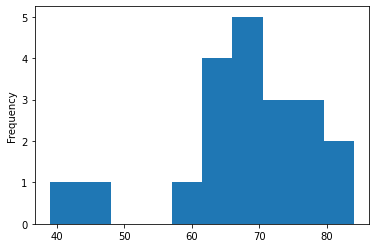

In [61]:
Halloween1 = Hal_pop['popularity'].plot.hist()
plt.show()

Here is the histogram of the Fall/Hallloween playlist popularity.

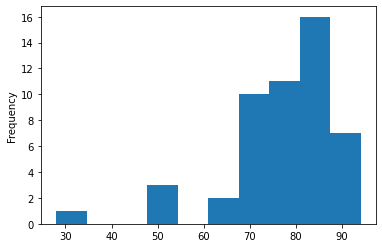

In [62]:
Winter1 = Win_pop['popularity'].plot.hist()
plt.show()

Here is the histogram of the Winter Holiday Playlist popularity.

In [63]:
audio_features = pd.concat([Win_pop, Hal_pop])

In [64]:
audio_features.to_csv('audio_features.csv')

In [65]:
af = pd.read_csv('audio_features.csv', sep = ',')

In [66]:
af.head()

,Unnamed: 0,album,duration_ms,id,name,popularity,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,"{'album_type': 'album', 'artists': [{'external...",357267.0,3S2R0EVwBSAVMd5UMgKTL0,All I Want for Christmas Is You,94,All I Want for Christmas Is You,0.773,0.859,11.0,-4.913,1.0,0.0747,0.0855,0.000187,0.914,0.813,118.459,4.0
1,1,"{'album_type': 'album', 'artists': [{'external...",239133.0,569uHYIB0X324FZOBEhvit,Rockin' Around The Christmas Tree,92,Rockin' Around The Christmas Tree,0.778,0.719,4.0,-9.698,1.0,0.0345,0.0123,0.026200,0.297,0.729,115.400,4.0
2,2,"{'album_type': 'single', 'artists': [{'externa...",192040.0,0xxZY5C9xxij3D1HkzbnfC,Jingle Bell Rock,91,Jingle Bell Rock,0.541,0.504,11.0,-14.191,0.0,0.4570,0.3750,0.000000,0.421,0.707,68.482,4.0
3,3,"{'album_type': 'album', 'artists': [{'external...",308120.0,5QTxFnGygVM4jFQiBovmRo,The Christmas Song (Merry Christmas To You),85,The Christmas Song (Merry Christmas To You),0.333,0.927,9.0,-8.550,0.0,0.0733,0.0029,0.000208,0.297,0.385,141.466,4.0
4,4,"{'album_type': 'album', 'artists': [{'external...",208400.0,2zYzyRzz6pRmhPzyfMEC8s,A Holly Jolly Christmas,86,A Holly Jolly Christmas,0.574,0.913,6.0,-4.793,0.0,0.1330,0.0610,0.001580,0.156,0.423,115.728,4.0


Here is the combined data frame of both playlists so I may use this data in graphs to compare to each other.

In [67]:
Hal_sort = Hal_pop.sort_values('popularity', ascending = False).head(10)

In [68]:
Hal_sort.head()

,album,duration_ms,id,name,popularity,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
4,"{'album_type': 'album', 'artists': [{'external...",208400,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,84,Highway to Hell,0.574,0.913,6,-4.793,0,0.1330,0.0610,0.001580,0.1560,0.423,115.728,4
17,"{'album_type': 'album', 'artists': [{'external...",306440,7EZC6E7UjZe63f1jRmkWxt,Zombie,81,Zombie,0.309,0.649,7,-8.994,1,0.0350,0.0158,0.005910,0.3670,0.312,166.915,4
13,"{'album_type': 'album', 'artists': [{'external...",261413,1i6N76fftMZhijOzFQ5ZtL,Psycho Killer - 2005 Remaster,78,Psycho Killer - 2005 Remaster,0.721,0.521,2,-8.123,1,0.0613,0.0708,0.005450,0.1270,0.942,123.118,4
3,"{'album_type': 'album', 'artists': [{'external...",308120,5QTxFnGygVM4jFQiBovmRo,(Don't Fear) The Reaper,76,(Don't Fear) The Reaper,0.333,0.927,9,-8.550,0,0.0733,0.0029,0.000208,0.2970,0.385,141.466,4
10,"{'album_type': 'compilation', 'artists': [{'ex...",245493,1h2xVEoJORqrg71HocgqXd,Superstition - Single Version,75,Superstition - Single Version,0.633,0.634,8,-12.115,1,0.0725,0.0380,0.006400,0.0385,0.872,100.499,4


We can conclude from this that the article's choices for most popular were incorrect. Being that "Highway to Hell" is the most popular and "Thriller" is not even in the top 5 as originally stated. 

In [69]:
Win_sort = Win_pop.sort_values('popularity', ascending = False).head(10)

In [70]:
Win_sort.head()

,album,duration_ms,id,name,popularity,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"{'album_type': 'album', 'artists': [{'external...",357267.0,3S2R0EVwBSAVMd5UMgKTL0,All I Want for Christmas Is You,94,All I Want for Christmas Is You,0.773,0.859,11.0,-4.913,1.0,0.0747,0.0855,0.000187,0.9140,0.813,118.459,4.0
1,"{'album_type': 'album', 'artists': [{'external...",239133.0,569uHYIB0X324FZOBEhvit,Rockin' Around The Christmas Tree,92,Rockin' Around The Christmas Tree,0.778,0.719,4.0,-9.698,1.0,0.0345,0.0123,0.026200,0.2970,0.729,115.400,4.0
2,"{'album_type': 'single', 'artists': [{'externa...",192040.0,0xxZY5C9xxij3D1HkzbnfC,Jingle Bell Rock,91,Jingle Bell Rock,0.541,0.504,11.0,-14.191,0.0,0.4570,0.3750,0.000000,0.4210,0.707,68.482,4.0
7,"{'album_type': 'single', 'artists': [{'externa...",238773.0,6hci8n9UowepjRmCc6CKTv,Last Christmas,91,Last Christmas,0.773,0.505,1.0,-10.357,0.0,0.0329,0.1030,0.000138,0.0729,0.891,124.131,4.0
20,"{'album_type': 'single', 'artists': [{'externa...",NaN,NaN,Santa Tell Me,91,Santa Tell Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here are the winter playlists, and you can tell that they were correct in "All I Want for Christmas" being the most popular among the winter holiday songs, but you can see they were wrong about the last remaining member of the top 5 being number 20, as they stated "Santa Tell Me" being the number 5 spot.

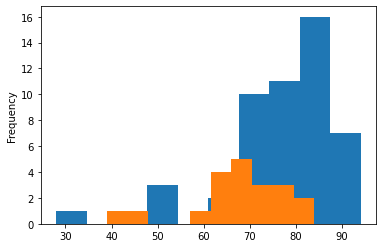

In [71]:
fig1, ax1 = plt.subplots()
Winter1 = Win_pop['popularity'].plot.hist()
Halloween1 = Hal_pop['popularity'].plot.hist()

plt.show()

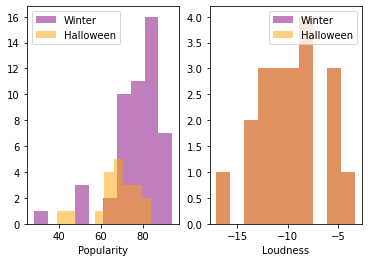

In [92]:
fig1, ax1 = plt.subplots(1, 2)
Wp = Win_pop['popularity']
Wl = Win_pop['loudness']
Hp = Hal_pop['popularity']
Hl = Hal_pop['loudness']
ax1[0].hist(Wp, alpha = 0.5, color = 'purple', label = 'Winter')
ax1[1].hist(Wl, alpha = 0.5, color = 'purple', label = 'Winter')
ax1[0].hist(Hp, alpha = 0.5, color = 'orange', label = 'Halloween')
ax1[1].hist(Hl, alpha = 0.5, color = 'orange', label = 'Halloween')
ax1[0].set_xlabel('Popularity')
ax1[1].set_xlabel('Loudness')
ax1[0].legend()
ax1[1].legend()
plt.show()

I was surprised to see that both playlists have the same loudness. While the population was quite different, it made a bit of sense that the winter holiday is more popular with lots of people and communities.

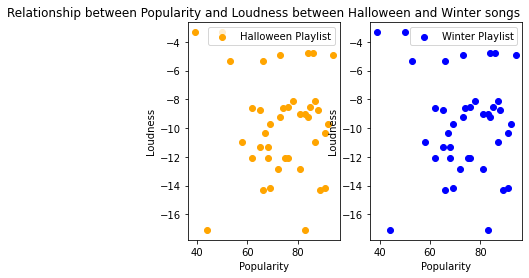

In [102]:
fig2, ax2 = plt.subplots(1, 2)
W_df = af 
H_df = af 
ax2[0].scatter(H_df['popularity'], H_df['loudness'], label = 'Halloween Playlist', color = 'orange')
ax2[1].scatter(W_df['popularity'], W_df['loudness'], label = 'Winter Playlist', color = 'blue')
ax2[0].set_xlabel('Popularity')
ax2[0].set_ylabel('Loudness')
ax2[1].set_xlabel('Popularity')
ax2[1].set_ylabel('Loudness')
ax2[0].set_title('Relationship between Popularity and Loudness between Halloween and Winter songs')
ax2[0].legend()
ax2[1].legend()
plt.show()